<a href="https://www.kaggle.com/code/khushboos/space-titanic?scriptVersionId=117919552" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# 1. Read the csv file

In [2]:
submission_data = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
print(f"Train Data\n{train_data.head(5)}\n\nTest Data\n{test_data.head(5)}\nsubmission Data\n\n{submission_data.head(5)}")

Train Data
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4       

In [3]:
print(f"Training data Null Values :\n\n{train_data.isnull().sum()}\n\nShape :\n{train_data.shape}")

Training data Null Values :

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Shape :
(8693, 14)


# 2. Data Preprocessing

In [4]:
# RoomService, Foodcourt, SHoingMall, Spa, Name is not necessary to identify the passenegr. So, drop those columns.
# drop_col = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'Name','Cabin']
drop_col = ['Name','Cabin']

train_data.drop(drop_col, axis=1, inplace=True)
test_data.drop(drop_col, axis=1, inplace=True)

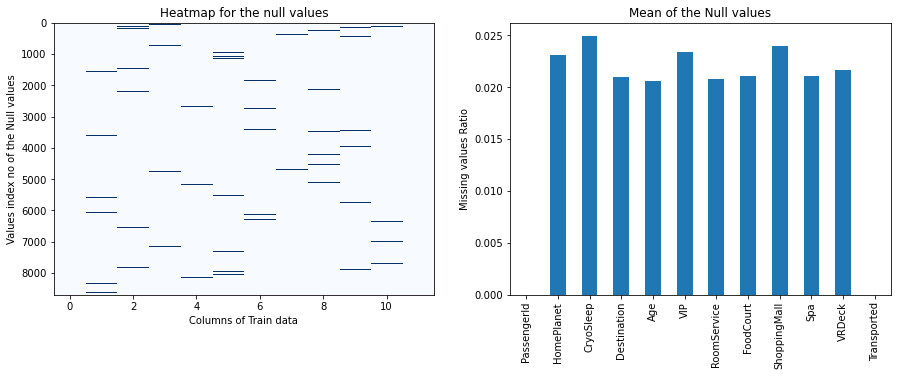

In [5]:
plt.subplots(1,2,figsize=(15, 5))
plt.subplot(1,2,1)
plt.imshow(train_data.isnull(),interpolation="nearest", cmap="Blues",aspect="auto",)# vmin=0, vmax=1,cmap="Blues")
plt.xlabel("Columns of Train data")
plt.ylabel("Values index no of the Null values")
plt.title("Heatmap for the null values")

plt.subplot(1,2,2)
train_data.isnull().mean().plot(kind="bar", title="Mean of the Null values", ylabel="Missing values Ratio")
plt.show()

from the above graphs, it is clear that the 'PassengerId' and "Transported" has no null values. so lets check the data types of other columns and replace the null values.

In [6]:
#  Check the data types of the columns
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


Check the occurance of the values on columns, it will give us the idea about values that needs to be fill in the "NaN" positions.

In [7]:
count_col = ['HomePlanet','CryoSleep','Destination','VIP']
for col in train_data[count_col]:
    print(train_data[col].value_counts())
    print("\n")
    print(train_data[col].mode()) 
    print("\n--------------------------")

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


0    Earth
dtype: object

--------------------------
False    5439
True     3037
Name: CryoSleep, dtype: int64


0    False
dtype: object

--------------------------
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


0    TRAPPIST-1e
dtype: object

--------------------------
False    8291
True      199
Name: VIP, dtype: int64


0    False
dtype: object

--------------------------


In [8]:
# Replacing the null values with the mode 
for col in count_col:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

In [9]:
train_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Age Distribution')

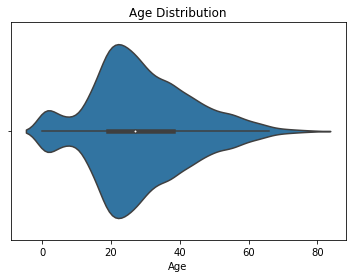

In [10]:
# Lets check the Age of the Passenger
sns.violinplot(train_data['Age'], origin='h')
# sns.violinplot(train_data, orient="v")

plt.title("Age Distribution")

In [11]:
# As we can see the Meadian value of the age column is near to the peak of this graph.
# So we can replace the Nan with the median value of the age
print(f"Median Age:\t{train_data['Age'].median()}")
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

Median Age:	27.0


<AxesSubplot:>

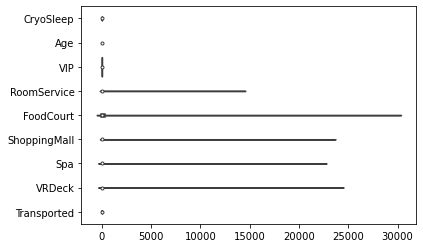

In [12]:
# train_data.isnull().sum()
# sns.violinplot(train_data['VRDeck'])
sns.violinplot(data=train_data, orient='h')

In [13]:
Spendings = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

for col in Spendings:
    train_data[col].fillna(train_data[col].median(), inplace=True)
    test_data[col].fillna(test_data[col].median(), inplace=True)

In [14]:
train_data.head(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [15]:
print(f"{train_data['HomePlanet'].unique()}\n{train_data['Destination'].unique()}")

['Europa' 'Earth' 'Mars']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']


In [16]:
diff_col = ['HomePlanet', 'Destination']
train_data = pd.concat([train_data, pd.get_dummies(train_data[diff_col])], axis=1)
test_data = pd.concat([test_data, pd.get_dummies(test_data[diff_col])], axis=1 )

train_data.drop(diff_col, axis=1, inplace=True)
test_data.drop(diff_col, axis=1, inplace=True)

# train_data = pd.concat(concat_train_data, axis=1)
# test_data = pd.concat(concat_test_data, axis=1)

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   bool   
 2   Age                        8693 non-null   float64
 3   VIP                        8693 non-null   bool   
 4   RoomService                8693 non-null   float64
 5   FoodCourt                  8693 non-null   float64
 6   ShoppingMall               8693 non-null   float64
 7   Spa                        8693 non-null   float64
 8   VRDeck                     8693 non-null   float64
 9   Transported                8693 non-null   bool   
 10  HomePlanet_Earth           8693 non-null   uint8  
 11  HomePlanet_Europa          8693 non-null   uint8  
 12  HomePlanet_Mars            8693 non-null   uint8  
 13  Destination_55 Cancri e    8693 non-null   uint8

In [18]:
# train_data = pd.concat(concate_train, axis=1)
col = ['VIP','CryoSleep']
train_data[col] = train_data[col].astype('int')
test_data[col] = test_data[col].astype('int')

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   int64  
 2   Age                        8693 non-null   float64
 3   VIP                        8693 non-null   int64  
 4   RoomService                8693 non-null   float64
 5   FoodCourt                  8693 non-null   float64
 6   ShoppingMall               8693 non-null   float64
 7   Spa                        8693 non-null   float64
 8   VRDeck                     8693 non-null   float64
 9   Transported                8693 non-null   bool   
 10  HomePlanet_Earth           8693 non-null   uint8  
 11  HomePlanet_Europa          8693 non-null   uint8  
 12  HomePlanet_Mars            8693 non-null   uint8  
 13  Destination_55 Cancri e    8693 non-null   uint8

# Data Splitting

In [20]:
train_Y = train_data["Transported"] 
train_X = train_data.drop(columns = ['Transported'], axis=1)

In [21]:
print(train_X.shape, train_Y.shape)

(8693, 15) (8693,)


In [22]:
X, X_val, Y, Y_val = train_test_split(train_X, train_Y, train_size = 0.8, random_state=42)
print(X.shape, X_val.shape, Y.shape, Y_val.shape)

(6954, 15) (1739, 15) (6954,) (1739,)


# Random Forest Classifier

In [23]:
RF = RandomForestClassifier(max_depth=9.5)
RF.fit(X, Y)

RandomForestClassifier(max_depth=9.5)

In [24]:
Y_predict = RF.predict(X_val)
Y_predict

array([False,  True,  True, ..., False,  True, False])

In [25]:
# Let's find the accuracy of the predicted model
accuracy_score(Y_val, Y_predict)

0.7883841288096607

Validation accuracy is 0.7889591719378953.

# Test Prediction

In [26]:
test_predict = RF.predict(test_data)
test_id = test_data['PassengerId']

In [27]:
output = pd.DataFrame({'PassengerId':test_id,'Transported':test_predict})
output

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [28]:
output.to_csv('submission.csv', index=False)

In [29]:
# print()